In [4]:
import pandas as pd
import numpy as np
import re

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import random
from sklearn import linear_model, metrics
from collections import defaultdict

# Exploratory Data Analysis (EDA)

## Data Import

In [10]:
df_recipes = pd.read_csv("D://Python-Code/CSE258/assignment2/dataset/RAW_recipes.csv")

df_interactions = pd.read_csv("D://Python-Code/CSE258/assignment2/dataset/RAW_interactions.csv")

# Merge recipes and interactions together 
df = pd.merge(df_recipes, df_interactions, left_on='id', right_on='recipe_id', how='left')

In [6]:
df_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [6]:
df_interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [7]:
df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,178427,137739,2011-12-05,5,Excellent recipe! I used butternut squash and ...
3,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,28603,31490,2002-08-19,0,"Have not tried this, but it sounds delicious. ..."
4,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,346277,31490,2006-08-27,5,This recipe was wonderful. Instead of using t...


From df, we can see that there are many users giving reviews and ratings for the same recipe. 

## Check Missing Values

In [11]:
df.isna().sum()

name                  1
id                    0
minutes               0
contributor_id        0
submitted             0
tags                  0
nutrition             0
n_steps               0
steps                 0
description       23510
ingredients           0
n_ingredients         0
user_id               0
recipe_id             0
date                  0
rating                0
review              169
dtype: int64

The only column with a significant amount of missing values is the description. There are also 165 interactions that involve a rating with no review.

## Feature Engineering

### Time Components

In [12]:
# Convert date columns to datetime format
df['submitted'] = pd.to_datetime(df['submitted'])
df['date'] = pd.to_datetime(df['date'])

In [13]:
df['submission_month'] = df['submitted'].dt.month_name()
df['submission_year'] = df['submitted'].dt.year
df['review_month'] = df['date'].dt.month_name()
df['review_year'] = df['date'].dt.year

### Nutritional Values

In [14]:
#regex for getting the numbers of a weird string array

def split_str_array_of_numbers(text):
    newtext = re.sub(r'[\[\])]', '', text)
    list_str = re.split(",", newtext)
    list_nums = [eval(i) for i in list_str]
    return list_nums

In [15]:
df_recipes['nutrition_arr'] = df_recipes['nutrition'].apply(split_str_array_of_numbers)

df['nutrition_arr'] = df['nutrition'].apply(split_str_array_of_numbers)

In [16]:
df_recipes = df_recipes.nutrition_arr.apply(pd.Series).merge(df_recipes, right_index = True, left_index = True).rename(columns={0: "calories", 1: "total_fat", 2: "sugar", 3:"sodium", 4:"protein", 5:"saturated_fat", 6:"carbohydrates"})

df = df.nutrition_arr.apply(pd.Series).merge(df, right_index = True, left_index = True).rename(columns={0: "calories", 1: "total_fat", 2: "sugar", 3:"sodium", 4:"protein", 5:"saturated_fat", 6:"carbohydrates"})

### Ingredients

In [17]:
def split_ingredients(text):
    newtext = re.sub(r'[\[\])]', '', text)
    list_str = re.split(",", newtext)
    return list_str

In [18]:
df_recipes['ingredients'] = df_recipes['ingredients'].apply(split_ingredients)

df['ingredients'] = df['ingredients'].apply(split_ingredients)

In [19]:
df_recipes['ingredients'][0]

["'winter squash'",
 " 'mexican seasoning'",
 " 'mixed spice'",
 " 'honey'",
 " 'butter'",
 " 'olive oil'",
 " 'salt'"]

In [16]:
df_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,nutrition_arr
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixe...",7,"[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]"
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'e...",6,"[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]"
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced toma...",13,"[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]"
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', '...",11,"[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]"
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sug...",8,"[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]"


In [17]:
df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,user_id,recipe_id,date,rating,review,submission_month,submission_year,review_month,review_year,nutrition_arr
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...,September,2005,February,2006,"[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]"
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...,September,2005,August,2010,"[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]"
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,178427,137739,2011-12-05,5,Excellent recipe! I used butternut squash and ...,September,2005,December,2011,"[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]"
3,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,28603,31490,2002-08-19,0,"Have not tried this, but it sounds delicious. ...",June,2002,August,2002,"[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]"
4,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,346277,31490,2006-08-27,5,This recipe was wonderful. Instead of using t...,June,2002,August,2006,"[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]"


### Review and Description Length

In [20]:
df['review_length'] = df['review'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)
df['description_length'] = df['description'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

## Data Visualization and Analysis

### Basic Distribution

In [ ]:
### Rating

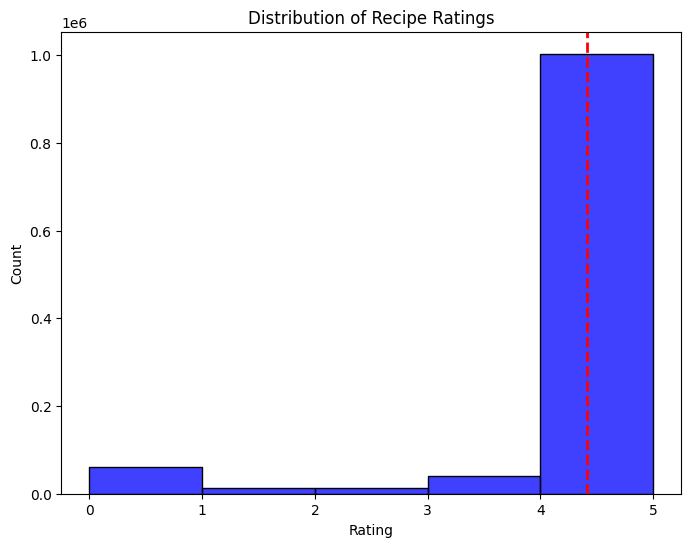

In [8]:
# 绘制直方图和垂直线
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='rating', color='blue', binwidth=1)
plt.axvline(df['rating'].mean(), color='red', linestyle='dashed', linewidth=2)

# 设置标题和轴标签
plt.title("Distribution of Recipe Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")

# 设置x轴刻度
plt.xticks(range(0, 6))

# 显示图形
plt.show()

In [78]:
sum(df['rating'] == 4)

187360

In [21]:
mean_rating = np.mean(df['rating'])
print("Mean Rating: {:.2f}".format(mean_rating))

Mean Rating: 4.41


Most people rate the recipes very positively (a 0 means the user hasn’t tried the recipe). And the mean rating is 4.41.

In [ ]:
### Minutes

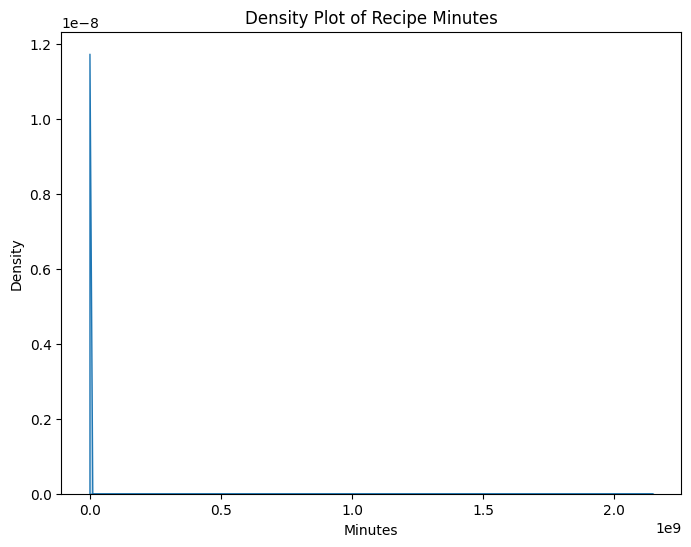

In [22]:
# 执行相应的select和distinct操作
selected_data = df[['id', 'name', 'minutes']].drop_duplicates()

# 绘制密度图
plt.figure(figsize=(8, 6))
sns.kdeplot(data=selected_data, x='minutes', fill=True)

# 设置标题和轴标签
plt.title("Density Plot of Recipe Minutes")
plt.xlabel("Minutes")
plt.ylabel("Density")

# 显示图形
plt.show()

There are some strangely high values that are skewing the data.

In [23]:
# 执行相应的arrange操作
sorted_data = selected_data.sort_values(by='minutes', ascending=False)

# 输出前20行
result_df = sorted_data.head(20)

In [24]:
result_df

,id,name,minutes
713702,261647,no bake granola balls,2147483647
538592,447963,how to preserve a husband,1051200
522682,291571,homemade fruit liquers,288000
193161,216215,celtic druid s honey mead meade metheglin,259260
525747,425681,homemade vanilla,259205
771907,98912,peach brandy,216015
31383,70551,angelica liqueur,201610
876973,12931,rumtopf,187200
844641,172114,raspberry liqueur,172810
262324,153634,cinnamon extract,172800


The top row is certainly an error so we will filter this out.

In [25]:
removed_id = 261647
df = df[df['id'] != removed_id]

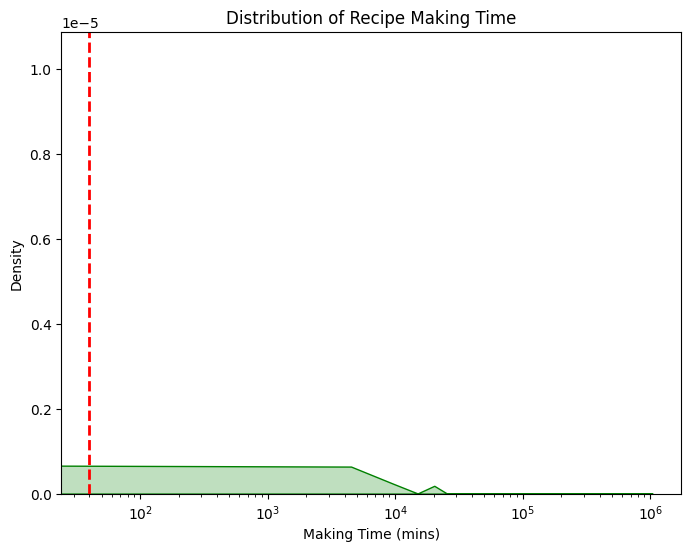

In [26]:
# 执行相应的select、filter和distinct操作
selected_data = df[['id', 'name', 'minutes']].drop_duplicates()

# 绘制密度图
plt.figure(figsize=(8, 6))
sns.kdeplot(data=selected_data, x='minutes', fill=True, color='green')

# 添加垂直线表示中位数
plt.axvline(selected_data['minutes'].median(), color='red', linestyle='dashed', linewidth=2)

# 设置x轴为对数刻度
plt.xscale('log')

# 设置标题和轴标签
plt.title("Distribution of Recipe Making Time")
plt.xlabel("Making Time (mins)")

# 显示图形
plt.show()

In [27]:
mean_minutes = np.median(df['minutes'])
print("Mean Minutes: {:.2f}".format(mean_minutes))

Mean Minutes: 40.00


### Correlation Plot

In [28]:
df.columns.tolist()

['calories',
 'total_fat',
 'sugar',
 'sodium',
 'protein',
 'saturated_fat',
 'carbohydrates',
 'name',
 'id',
 'minutes',
 'contributor_id',
 'submitted',
 'tags',
 'nutrition',
 'n_steps',
 'steps',
 'description',
 'ingredients',
 'n_ingredients',
 'user_id',
 'recipe_id',
 'date',
 'rating',
 'review',
 'submission_month',
 'submission_year',
 'review_month',
 'review_year',
 'nutrition_arr',
 'review_length',
 'description_length']

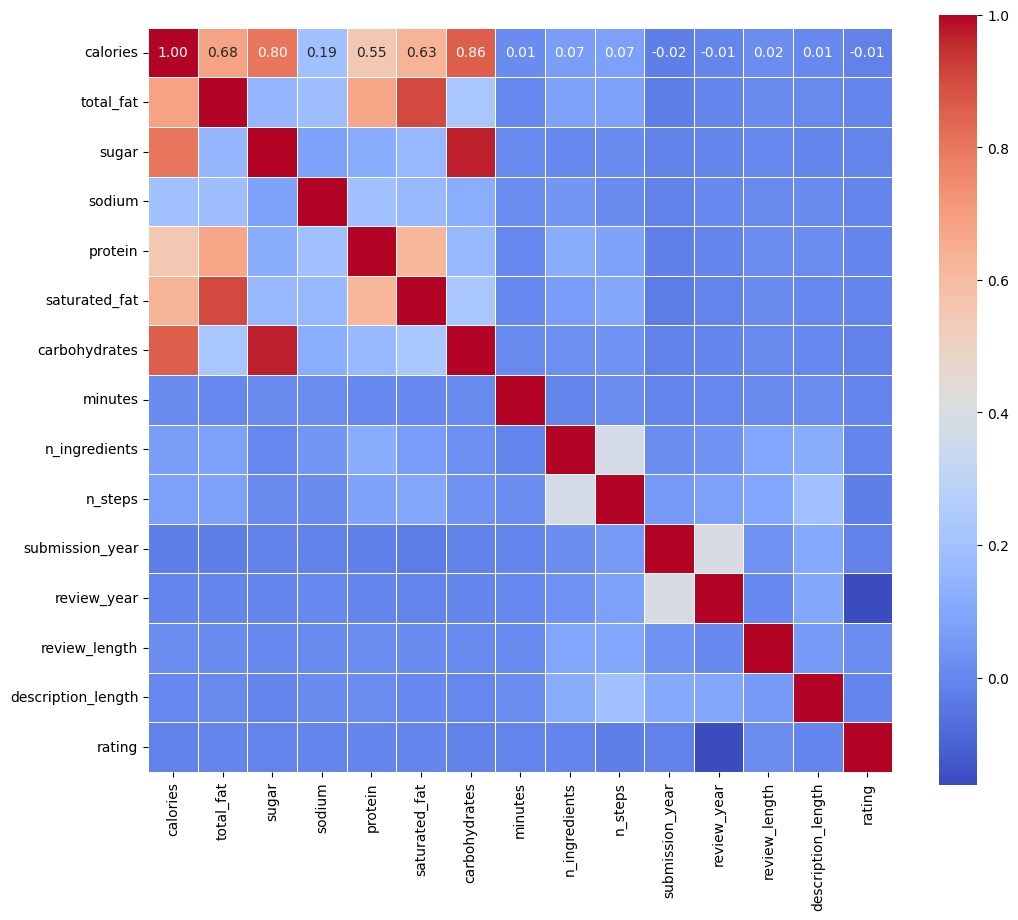

In [132]:
# 选择想要检查的feature，查看关联性
features = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat','carbohydrates','minutes', 'n_ingredients', 'n_steps', 'submission_year', 'review_year', 'review_length', 'description_length', 'rating']

# 选择需要计算相关性的列并去除缺失值
corr_values = df[features].dropna()

# 计算相关性矩阵
corrmat1 = corr_values.corr()

# 绘制相关性矩阵热图
plt.figure(figsize=(12, 10))
sns.heatmap(corrmat1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, square=True)

# 显示图形
plt.show()

The one negative relationship is rating and review year, interestingly, which means that reviews have become slightly more negative over time.

## Text Analysis

In [30]:
df['ingredients'][0]

["'winter squash'",
 " 'mexican seasoning'",
 " 'mixed spice'",
 " 'honey'",
 " 'butter'",
 " 'olive oil'",
 " 'salt'"]

### Ingredients

In [31]:
ingredients = df[['ingredients', 'rating']].explode('ingredients', ignore_index=True)

In [32]:
ingredients.head()

,ingredients,rating
0,'winter squash',5
1,'mexican seasoning',5
2,'mixed spice',5
3,'honey',5
4,'butter',5


In [33]:
# 移除单引号
ingredients['ingredients'] = ingredients['ingredients'].str.replace(r'\'', '', regex=True)

# 分组并计算数量和平均评分
ingredients2 = ingredients.groupby('ingredients').agg(count=('rating', 'count'), avg_rating=('rating', 'mean')).reset_index()

# 输出前10行
print(ingredients2.head(10))

                               ingredients  count  avg_rating
0                "adolphs meat tenderizer"     21    4.857143
1                "annies goddess dressing"      4    4.500000
2         "aunt janes krazy mixed up salt"     64    4.453125
3   "bakers angel flake sweetened coconut"      4    4.250000
4               "bakers germans chocolate"     20    4.650000
5     "bakers semi-sweet baking chocolate"      4    5.000000
6            "bakers semi-sweet chocolate"     30    4.733333
7                "bakers special dry milk"     11    5.000000
8    "bakers unsweetened chocolate square"      2    5.000000
9   "bakers unsweetened chocolate squares"     20    4.400000


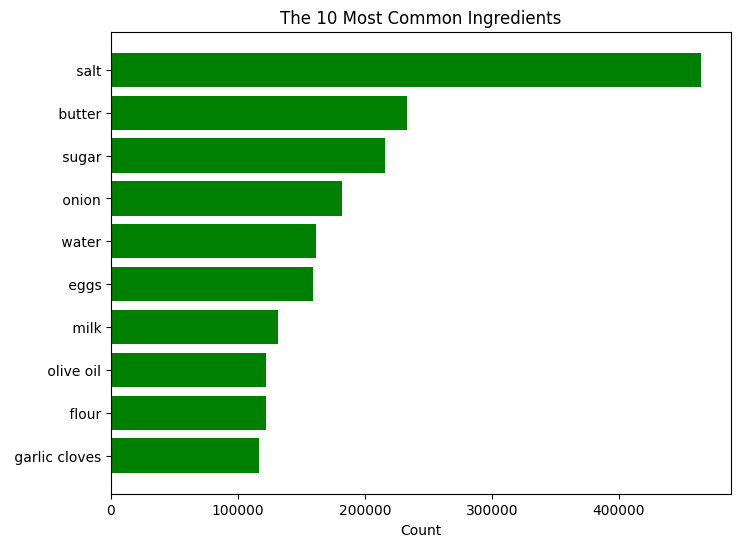

In [34]:
# 排序并选择前10个最常见的成分
top_10_ingredients = ingredients2.sort_values(by='count', ascending=False).head(10)

# 使用 matplotlib 绘制水平条形图
plt.figure(figsize=(8, 6))
plt.barh(top_10_ingredients['ingredients'], top_10_ingredients['count'], color='green')
plt.xlabel('Count')
plt.title('The 10 Most Common Ingredients')
plt.gca().invert_yaxis()  # 反转y轴以使最常见的成分显示在顶部
plt.show()

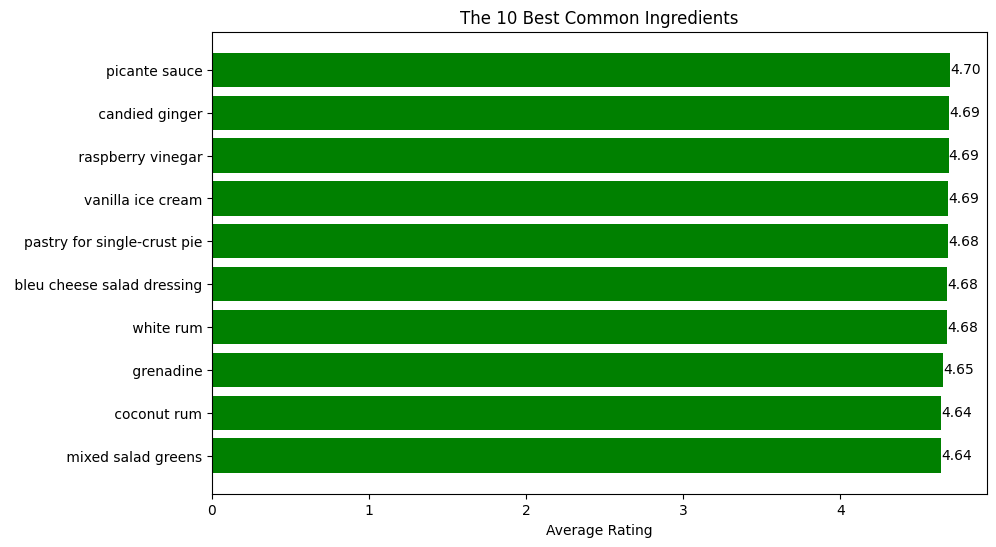

In [35]:
# 过滤、排序和选择前10行
top_10_best_ingredients = ingredients2.query('count >= 500').sort_values(by='avg_rating', ascending=False).head(10)

# 使用 Matplotlib 绘制水平条形图
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_best_ingredients['ingredients'], top_10_best_ingredients['avg_rating'], color='green')

# 在每个条形上方标注平均评分
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center', ha='left')

plt.gca().invert_yaxis()  # 反转y轴以使最好的成分显示在顶部
plt.xlabel('Average Rating')
plt.title('The 10 Best Common Ingredients')
plt.show()

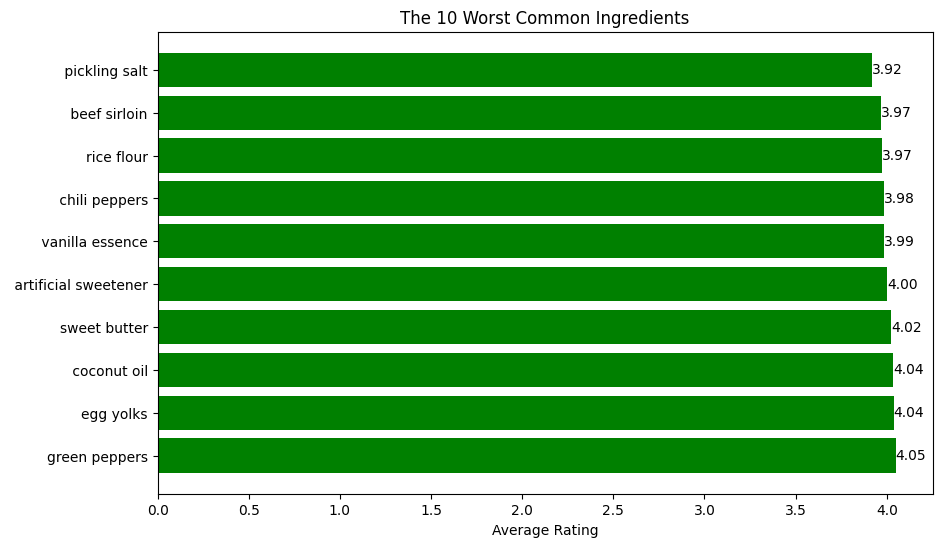

In [36]:
# 过滤、排序和选择后10行
bottom_10_worst_ingredients = (ingredients2.query('count >= 500')
                                          .sort_values(by='avg_rating')
                                          .head(10))

# 使用 Matplotlib 绘制水平条形图
plt.figure(figsize=(10, 6))
bars = plt.barh(bottom_10_worst_ingredients['ingredients'], bottom_10_worst_ingredients['avg_rating'], color='green')

# 在每个条形上方标注平均评分
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center', ha='left')

plt.gca().invert_yaxis()  # 反转y轴以使最差的成分显示在顶部
plt.xlabel('Average Rating')
plt.title('The 10 Worst Common Ingredients')
plt.show()

### Exclamatory Reviews

In [37]:
df['num_exclam'] = df['review'].apply(lambda x: len(re.findall(r'!', str(x))))

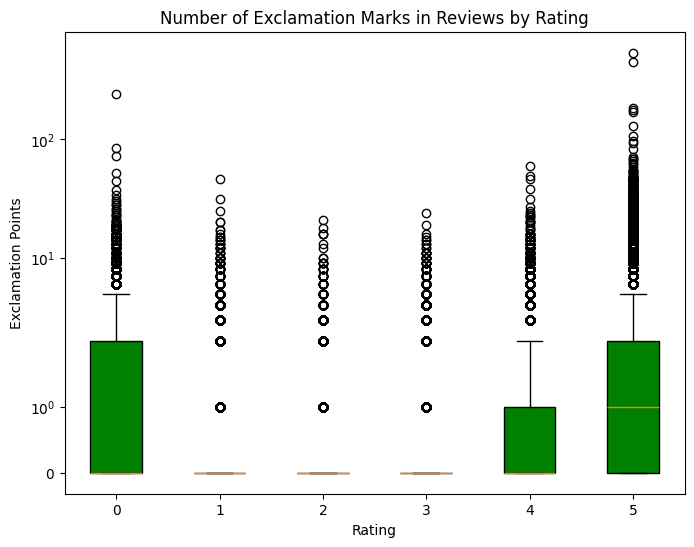

In [38]:
# Sort the DataFrame by 'rating'
reviews2 = df.sort_values(by='rating')

# 使用 Matplotlib 绘制箱线图
plt.figure(figsize=(8, 6))
plt.boxplot(reviews2.groupby('rating')['num_exclam'].apply(list), patch_artist=True, labels=reviews2['rating'].unique(), boxprops=dict(facecolor='green'))

# 对数坐标轴
plt.yscale('symlog')

plt.xlabel('Rating')
plt.ylabel('Exclamation Points')
plt.title('Number of Exclamation Marks in Reviews by Rating')
plt.show()

In [39]:
# 计算相关系数
correlation_value = np.corrcoef(reviews2['num_exclam'], reviews2['rating'])[0, 1]

# 打印结果
print(f"Correlation Value: {correlation_value:.2f}")

Correlation Value: 0.15


People who write many exclamation marks tend to give higher ratings

## Word Clouds

In [40]:
from wordcloud import WordCloud

### Ingredients

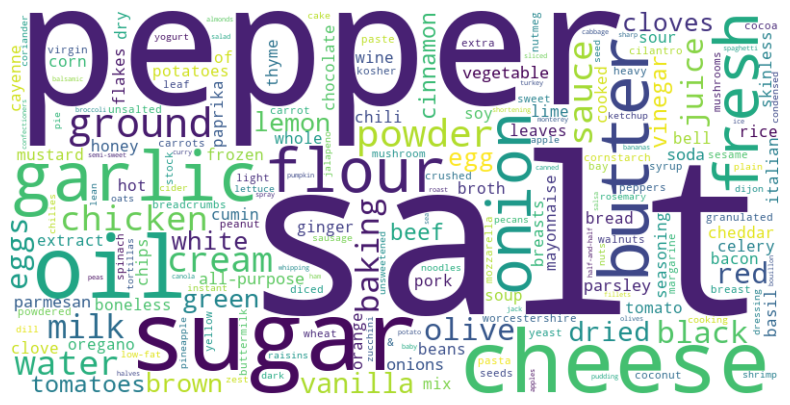

In [41]:
# 处理数据
ingred = (ingredients['ingredients']
          .str.split(expand=True)
          .stack()
          .reset_index(level=0)
          .rename(columns={0: 'ingredients'})
          .assign(ingredients=lambda x: x['ingredients'].str.replace('"', ''))
          .groupby('ingredients')
          .size()
          .reset_index(name='n')
          .query('ingredients not in ["s", "the", "and", "or", "a", ""]'))

# 创建词云
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white', random_state=42).generate_from_frequencies(dict(zip(ingred['ingredients'], ingred['n'])))

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Recipes

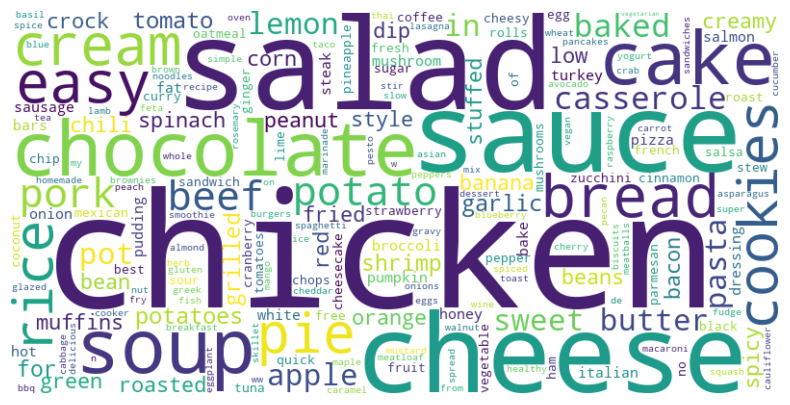

In [42]:
# 处理数据
names = (df_recipes['name']
         .str.split(expand=True)
         .stack()
         .reset_index(level=0)
         .rename(columns={0: 'name'})
         .groupby('name')
         .size()
         .reset_index(name='n')
         .query('name not in ["s", "the", "and", "or", "a", "", "with"]'))

# 创建词云
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white', random_state=42).generate_from_frequencies(dict(zip(names['name'], names['n'])))

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Models

In [43]:
from sklearn.model_selection import train_test_split

# 分割数据集
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

## Similarity Model

In [44]:
def Jaccard(s1, s2):
    # ...
    intersection = len(s1.intersection(s2))
    union = len(s1.union(s2))
    return intersection / union if union != 0 else 0

In [45]:
def MSE(y, ypred):
    # ...
    differences = [(x-y)**2 for x,y in zip(ypred,y)]
    return sum(differences) / len(differences)

In [159]:
# inter_test = pd.read_csv("D://Python-Code/CSE258/assignment2/dataset/interactions_test.csv")
# inter_train = pd.read_csv("D://Python-Code/CSE258/assignment2/dataset/interactions_train.csv")
# inter_val = pd.read_csv("D://Python-Code/CSE258/assignment2/dataset/interactions_validation.csv")

In [160]:
# inter_val.head()

,user_id,recipe_id,date,rating,u,i
0,76535,33627,2005-02-15,4.0,5,177317
1,160497,75307,2005-10-24,4.0,23,170785
2,930021,100961,2008-11-30,4.0,31,165555
3,58439,154105,2007-03-24,4.0,44,177453
4,628951,14525,2008-02-16,5.0,45,142367


In [46]:
usersPerItem = defaultdict(set) # Maps an item to the users who rated it
itemsPerUser = defaultdict(set) # Maps a user to the items that they rated
items = set()
users = set()
ratingDict = {} # To retrieve a rating for a specific user/item pair

reviewsPerUser = defaultdict(list)
reviewsPerItem = defaultdict(list)

# for d in dataTrain:
#     # ...

for index, row in train_df.iterrows():
    # ...
    u, i = row['user_id'], row['recipe_id']
    itemsPerUser[u].add(i)
    usersPerItem[i].add(u)

    ratingDict[(u,i)] = row['rating']

    items.add(i)
    users.add(u)

    reviewsPerUser[u].append(row)
    reviewsPerItem[i].append(row)


In [47]:
ratingMean = np.mean(train_df['rating'])

In [48]:
ratingMean

4.410773856965287

In [49]:
userAverages = {}
itemAverages = {}

for u in itemsPerUser:
    # ...
    rs = [ratingDict[(u,i)] for i in itemsPerUser[u]]
    userAverages[u] = sum(rs) / len(rs)
    
for i in usersPerItem:
    # ...
    rs = [ratingDict[(u,i)] for u in usersPerItem[i]]
    itemAverages[i] = sum(rs) / len(rs)

In [92]:
def predictRating(user, item):
    # ...
    # if that item hasn’t been seen before
    if item not in items: return ratingMean

    R_i = itemAverages[item]
    ratings = []
    similarities = []

    for d in reviewsPerUser[user]:
        # print(d)
        i2 = d['recipe_id']
        if i2 == item: continue

        sim = Jaccard(usersPerItem[item],usersPerItem[i2])     # Sim(i, j)
        R_u_j = d['rating']
        R_j = itemAverages[i2]

        ratings.append(R_u_j - R_j)
        similarities.append(sim)

    if (sum(similarities) > 0):
        weightedRatings = [(x*y) for x,y in zip(ratings,similarities)]
        pred =  R_i + sum(weightedRatings) / sum(similarities)
    else:
        # User hasn't rated any similar items
        pred =  R_i
    
    # From histogram of rating, we can see that the rating is at most 0, 4, 5
    if pred >= 5:
        pred = 5
    elif pred < 1:
        pred = 0
    
    return int(round(pred))

In [96]:
len(test_df)

226470

In [141]:
y = []
y_pred = []
n = 0
for _, row in test_df.iterrows():
    n += 1
    # print(row['rating'])
    real = row['rating']
    y.append(real)
    pred = predictRating(row['user_id'], row['recipe_id'])
    # print(pred)
    if abs(real - pred) > 1: pred = real
    y_pred.append(pred)
    if n % 10000 == 0: print(n, "Done")

10000 Done
20000 Done
30000 Done
40000 Done
50000 Done
60000 Done
70000 Done
80000 Done
90000 Done
100000 Done
110000 Done
120000 Done
130000 Done
140000 Done
150000 Done
160000 Done
170000 Done
180000 Done
190000 Done
200000 Done
210000 Done
220000 Done


In [154]:
y_pred2 = [round(i) for i in y_pred]

In [155]:
y_pred2[:10]

[5, 5, 5, 5, 4, 5, 5, 0, 5, 5]

In [146]:
y[:10]

[5, 5, 5, 5, 5, 5, 4, 0, 5, 5]

In [158]:
sum([y_pred2[i] == y[i] for i in range(len(y))]) / len(y)

0.7084382037355941

In [87]:
y2 = [ratingMean] * len(test_df)

In [173]:
y22 = [round(i) for i in y2]

In [88]:
y3 = [5] * len(test_df)

In [174]:
sum([y22[i] == y[i] for i in range(len(y))]) / len(y)

0.16553185852430785

### Improvement

In [82]:
from datetime import datetime

# input is a date string
# transform date to number
def date2int(date):
    #date_object = datetime.strptime(date, "%Y-%m-%d")

    timestamp = datetime.timestamp(date)

    number = int(timestamp)

    return number

In [80]:
import math

def decayFunc(t, c, type = "expo"):
    # Exponential Decay: This is one of the most common decay functions. It models the decreasing influence of older interactions exponentially over time.
    # f(t) = e^(-λt)
    if type == 'expo':
        return math.exp(- c * t)

In [83]:
# store time
times = {}

for index, row in train_df.iterrows():
    user, item = row['user_id'], row['recipe_id']
    times[(user,item)] = date2int(row['date'])

In [84]:
times

{(113928, 159002): 1143183600,
 (199848, 230470): 1181372400,
 (2000902872, 424183): 1457078400,
 (2001762080, 103215): 1508655600,
 (18391, 63244): 1058511600,
 (285039, 484132): 1344668400,
 (107186, 51038): 1187247600,
 (41919737, 2886): 1407394800,
 (1870301, 450153): 1302073200,
 (2000346131, 423164): 1437202800,
 (60936, 26297): 1057734000,
 (1672999, 391316): 1283065200,
 (2001823786, 339453): 1511596800,
 (156443, 97428): 1095145200,
 (243474, 23705): 1201680000,
 (1598438, 2886): 1421913600,
 (665570, 8554): 1254985200,
 (1802840515, 245418): 1403247600,
 (166642, 205933): 1223535600,
 (42362, 236811): 1341644400,
 (185305, 65977): 1201593600,
 (86520, 68832): 1096786800,
 (640173, 324414): 1221894000,
 (2324285, 463540): 1362470400,
 (1598796, 412600): 1271401200,
 (78808, 15200): 1105948800,
 (101823, 97839): 1093503600,
 (156034, 167613): 1147244400,
 (374752, 41728): 1262332800,
 (39949, 85129): 1111906800,
 (2310, 68306): 1065596400,
 (22973, 69680): 1074844800,
 (753468,

In [180]:
def predictRatingNew(user, item, c):
    # ...
    # if that item hasn’t been seen before
    if item not in items: return ratingMean

    R_i = itemAverages[item]
    ratings = []
    similarities = []
    decays = []

    t_i = times[(user, item)]     # t_u_i

    for d in reviewsPerUser[user]:
        # print(d)
        i2 = d['product_id']
        if i2 == item: continue

        sim = Jaccard(usersPerItem[item],usersPerItem[i2])     # Sim(i, j)
        R_u_j = d['star_rating']
        R_j = itemAverages[i2]
        t_j = times[(user, i2)]

        decays.append(decayFunc(abs(t_i - t_j), c))
        ratings.append(R_u_j - R_j)
        similarities.append(sim)
    
    weightedSimilarities = [(x*y) for x,y in zip(decays,similarities)]

    if (sum(weightedSimilarities) > 0):
        weightedRatings = [(x*y) for x,y in zip(ratings, weightedSimilarities)]
        return R_i + sum(weightedRatings) / sum(weightedSimilarities)
    else:
        # User hasn't rated any similar items
        return R_i

In [105]:
y = [row['rating'] for _, row in test_df.iterrows()]

In [187]:
best_c = 0
min_MSE = float("inf")
for i in range(5):
    c = 10 ** (-5 + i)
    pred_val = [predictRatingNew(row['user_id'], row['recipe_id'], c) for _, row in test_df.iterrows()]
    print(pred_val[:10])
    print("C is", c)
    mse_val = MSE(pred_val, y)
    print("MSE on val is:", mse_val)
    if mse_val < min_MSE:
        min_MSE = mse_val
        best_c  = c


[4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891]
C is 1e-05
MSE on val is: 1.813806180580191
[4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891]
C is 0.0001
MSE on val is: 1.813806180580191
[4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891]
C is 0.001
MSE on val is: 1.813806180580191
[4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891, 4.574089892559891]
C is 0.01
MSE on val is: 1.813806180580191
[4.574089892559891, 4.574089892559891, 4.574089892559891, 4.

## TF-IDF
1. convert every row to string for cleaning review text
2. Ignore capitalization and remove punctuation\


### Data Preparation

In [106]:
text = df_interactions['review']

In [107]:
X = []
#convert every row to string for cleaning review text
reviews = list(text)
for i in range(len(reviews)):
    if type(reviews[i]) != str:
        reviews[i] = str(reviews[i])

In [108]:
## cleaning all the text data and saving it to df_interactions.clean_review
X = []
for r in reviews:
    #removing punctuation, numbers, single chars, and multiple spaces from each essay
    r = re.sub('[^a-zA-Z]', ' ', r)
    r = re.sub(r"\s+[a-zA-Z]\s+", ' ', r)
    r = re.sub(r'\s+', ' ', r)
    X.append(r)

df_interactions['clean_review'] = X

In [109]:
df_interactions['clean_review'] = df_interactions['clean_review'].str.lower()

In [110]:
df_interactions.head()

,user_id,recipe_id,date,rating,review,clean_review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,great with salad cooked on top of stove for mi...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",so simple so delicious great for chilly fall e...
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,this worked very well and is easy used not qui...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,i made the mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",made the cheddar bacon topping adding sprinkli...


### Model Building
We will use a Niaves Bayes classifier because this is a supervised learner . Since the dataset is already cleaned, we just need to tokenize the text using a bag of words -> tfidf objects. Then, this object will be used to create text embeddings of the review_text. This is so we can feed our model with these embeddings. Finally, we will fit the model and assess its performance.

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, f1_score, classification_report, mean_squared_error

from nltk.corpus import stopwords
from sklearn.naive_bayes import GaussianNB #the supervised learning for use on vectors

import matplotlib.pyplot as plt
import matplotlib as mpl

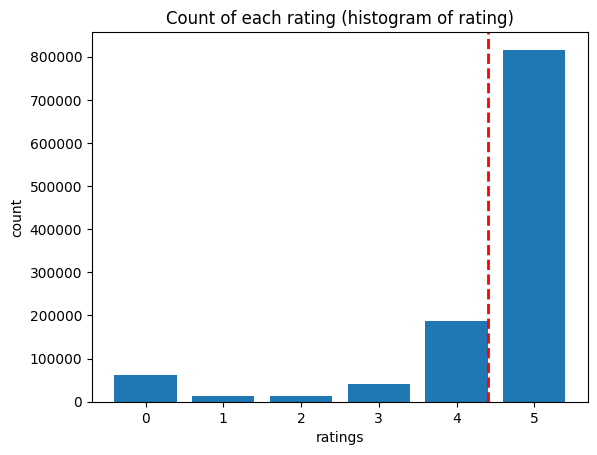

In [131]:
counts = []
for i in range(0,6):
    count = df_interactions['rating'].value_counts()[i]
    counts.append(count)

plt.bar(['0', '1' ,'2','3','4','5'],counts)
plt.axvline(df_interactions['rating'].mean(), color='red', linestyle='dashed', linewidth=2)

plt.xlabel("ratings")
plt.ylabel("count")
plt.title("Count of each rating (histogram of rating)")

plt.show()

In [130]:
np.mean(df_interactions['rating'])

4.411016039852804

This shows that the dataset might be bad at predicting reviews with a rating score of 0,1,2,3 and would be better at predicting reviews with a rating score of 4 or 5. This is because the dataset has a lot of reviews with a rating score of 5 than the others.

In [113]:
X = df_interactions['clean_review']
y = df_interactions['rating']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
X_train

419542    yum nice and spicy just as we like it served w...
87447     didn like it husband ate it just to make me ha...
750549    really delicious we used chicken thighs and le...
366591    we loved this recipe the sauce was wonderful s...
377558    delicious used panko crumbs instead of cracker...
                                ...                        
110268    wonderful pasta made it exactly as written and...
259178    i had high hopes for this and it was very good...
131932    not bad most people liked it but after followi...
671155    fabulous sangria recipe like this better than ...
121958    very good chicken marinade added just bit of c...
Name: clean_review, Length: 905893, dtype: object

In [169]:
len(X_train)

905893

In [115]:
#making BoW feature representation for each text
counter = CountVectorizer(stop_words="english", ngram_range=(1,3), max_features=10000, max_df=0.50, min_df=0.01)

In [116]:
X_train_bow = counter.fit_transform(X_train)
X_test_bow = counter.transform(X_test)

In [117]:
tfidfer = TfidfTransformer()

X_train_tfidf = tfidfer.fit_transform(X_train_bow)
X_test_tfidf = tfidfer.transform(X_test_bow)

In [167]:
X_train_tfidf.shape

(905893, 442)

In [159]:
X_train_tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.35878246],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [118]:
clf = GaussianNB()
clf.fit(X_train_tfidf.toarray(), y_train)

GaussianNB()

In [119]:
y_pred = clf.predict(X_test_tfidf.toarray())

In [129]:
MSE(y_pred, y_test)

6.388274150675133

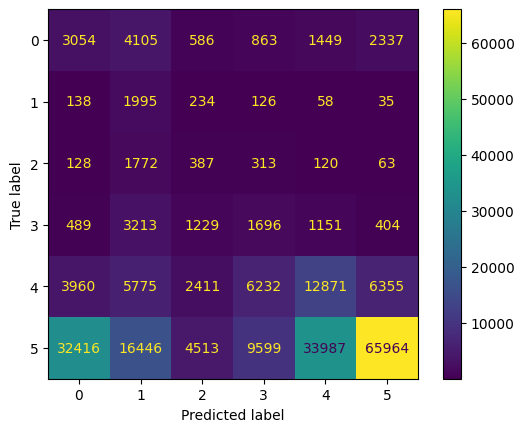

In [120]:
#confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()

As expected, the naive bayes model predicted better on the test data that was labeled as 5 rather than the the out 4 numbers. Its also interesting to note that not all review_text had a actual rating score indicative of their review_text because the rating score is optional on food.com. For example, take a look at some of review_text with ratings of 0 that said positive words indicative of a 4 or 5 rating score. This explains why the model would predict some reviews having a rating score of 0, when the review text actually had a rating score of 5.

In [121]:
df_interactions.loc[df_interactions['rating'] == 0].head()

,user_id,recipe_id,date,rating,review,clean_review
6,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I fo...",just an observation so will not rate followed ...
12,468945,134728,2008-02-20,0,Made my own buttermilk w/ vinegar and milk. U...,made my own buttermilk vinegar and milk used d...
23,681408,225241,2008-03-14,0,This is a very good recipe. We also want to c...,this is very good recipe we also want to cut b...
39,2002068522,29093,2018-03-26,0,i made it and it was amazing,i made it and it was amazing
56,980899,79222,2010-10-18,0,"I used half cream and half 1% milk, added anot...",i used half cream and half milk added another ...


In [134]:
cm.diagonal()/cm.sum(axis=0) * 100

array([ 7.59985069,  5.98991173,  4.13461538,  9.00738223, 25.93077605,
       87.76710397])

In [135]:
len(y_test)

226474

In [136]:
sum(cm.diagonal())

85967

In [140]:
sum(cm.diagonal()) * 1.8/ len(y_test)

0.6832598885523283